# Pymaceuticals Inc.
---

### Analysis

- Took out duplicate mouse, possible reason is that there could have been two mice and one of them died during the trial.
- the bar charts show that Capuomulin and ramicane ran the longest out of all the drugs.
- the population of the data was evenly dispered with the male population being 51% and female 49%
- the possible reason for the one outlier was that the mouse could have died early on in the trial.
- there is a positivr correlation between mouse weight and the average tumor volume
 

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data = pd.merge(study_results, mouse_metadata, how= 'left', on='Mouse ID')

# Display the data table for preview'

mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [40]:
# Checking the number of mice.
mouse_number =len(mouse_data["Mouse ID"].unique())
mouse_number


249

In [41]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_1 = mouse_data[mouse_data[['Mouse ID','Timepoint']].duplicated()==True]
duplicate_mouse = mouse_data.loc[mouse_data.duplicated(subset = ['Mouse ID','Timepoint'])]["Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [42]:
# Optional: Get all the data for the duplicate mouse ID. 
# school_data_complete.loc[school_data_complete["math_score"] > 70]
mouse_data.loc[mouse_data['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [43]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# mouse_clean = mouse_data.drop_duplicates(subset = ['Mouse ID', "Timepoint"])
# mouse_clean

mouse_clean = mouse_data[mouse_data['Mouse ID'].isin(duplicate_mouse) == False]
mouse_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [44]:
# Checking the number of mice in the clean DataFrame.
len(mouse_clean["Mouse ID"].unique())


248

## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_regimen = mouse_clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].mean()
median_regimen = mouse_clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].median()
variance_regimen = mouse_clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].var()
std_regimen = mouse_clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].std()
sem_regimen = mouse_clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].sem()



# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mouse_summary = pd.DataFrame({"Mean Tumor Volume":mean_regimen,
                                 "Median Tumor Volume":median_regimen,
                                 "Tumor Volume Variance":variance_regimen,
                                 "Tumor Volume Std. Dev.":std_regimen,
                                 "Tumor Volume Std. Err.":sem_regimen})

mouse_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [46]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_summary2 = mouse_clean.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].agg(['mean','median','var','std', 'sem'])
mouse_summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

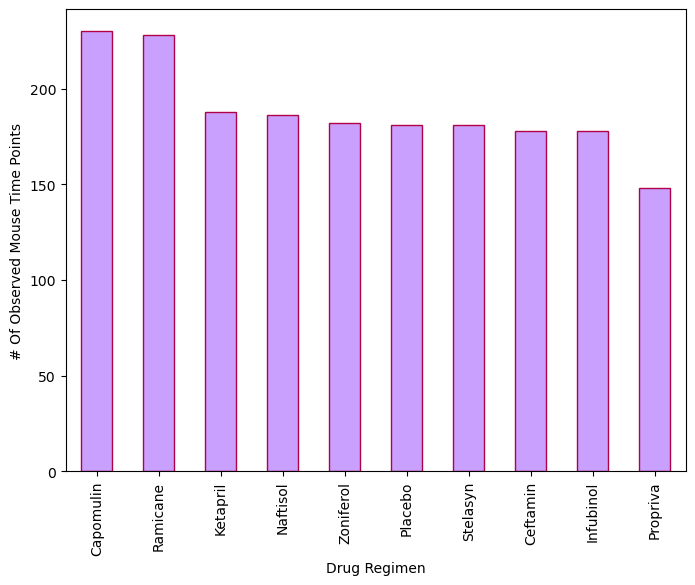

In [47]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# mouse_bar = mouse_clean["Drug Regimen"].value_counts()
mouse_bar = mouse_clean.groupby(["Drug Regimen"])['Mouse ID'].count().sort_values(ascending=False)


mouse_bar.plot(kind="bar", figsize=(8,6),color ='xkcd:pastel purple', edgecolor ='xkcd:raspberry', ylabel =  "# Of Observed Mouse Time Points")
plt.savefig("images/pandasbar.png")
plt.show()

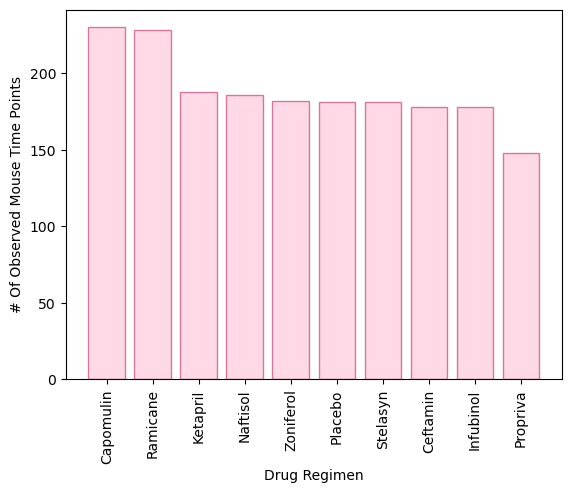

<Figure size 1000x600 with 0 Axes>

In [69]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(mouse_bar))
mouse_index = mouse_bar.index
y_axis = [value for value in mouse_bar]
ticks = [value for value in x_axis]
plt.bar(x_axis, y_axis, color ='xkcd:baby pink',edgecolor ='xkcd:raspberry',  alpha=0.5)
plt.xticks(ticks, mouse_index, rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# Of Observed Mouse Time Points")
plt.figure(figsize=(10,6))
plt.savefig("images/matpltbar.png")
plt.show()






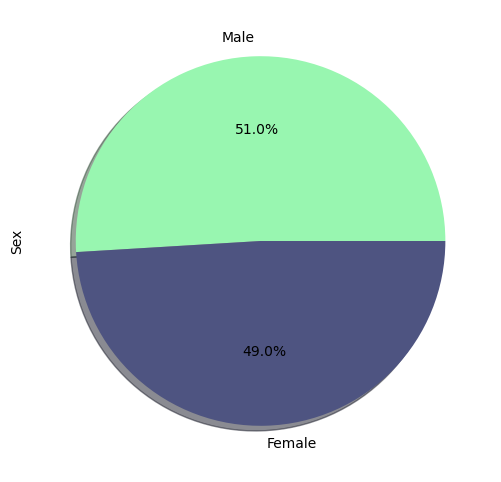

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas\
mouse_pie = mouse_clean['Sex'].value_counts()
colors = []
# mouse_pie = mouse_clean.groupby(['Sex'])['Mouse ID'].count().sort_values(ascending=False)
mouse_pie.plot.pie(ylabel = 'Sex', figsize = (10,6),autopct='%1.1f%%', 
                   colors = ['xkcd:light sea green', 'xkcd:dusk'], shadow = True)
plt.savefig("images/pandaspie.png")
plt.show()

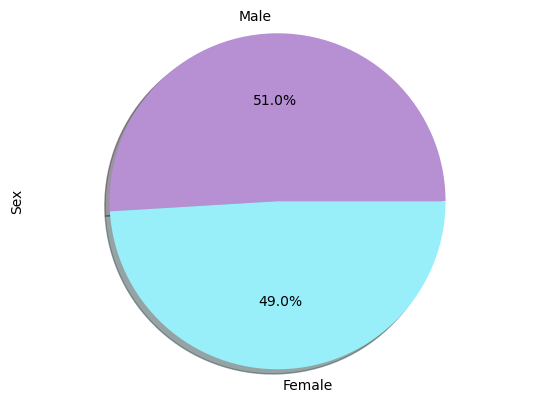

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
percentages = [value for value in mouse_pie]
labels = mouse_pie.index
plt.pie(percentages,  labels=labels, colors=['xkcd:pale purple', '#98eff9'],
        autopct="%1.1f%%", shadow=True)
plt.ylabel('Sex')
plt.axis("equal")
plt.savefig("images/matpltpie.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = mouse_clean.groupby(["Mouse ID"])['Timepoint'].max()
# max_timepoint= max_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_merge = pd.merge(max_timepoint, mouse_clean, on =['Mouse ID','Timepoint'], how = 'left')
timepoint_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [52]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_1 = timepoint_merge.loc[timepoint_merge["Drug Regimen"] == i]["Tumor Volume (mm3)"]
    # add subset 
    tumor_vol.append(tumor_vol_1)
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_1.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # seeing if any of the final tumor volumes are greater than the upper bound or lower 
    #than the lower bound and those will be the outliers
    outliers = tumor_vol_1.loc[(tumor_vol_1 < lower_bound) | (tumor_vol_1 > upper_bound)]
    print(f"{i} the potential outliers: {outliers}")
    



    
    
    

    
    

    
    


Capomulin the potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane the potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol the potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin the potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


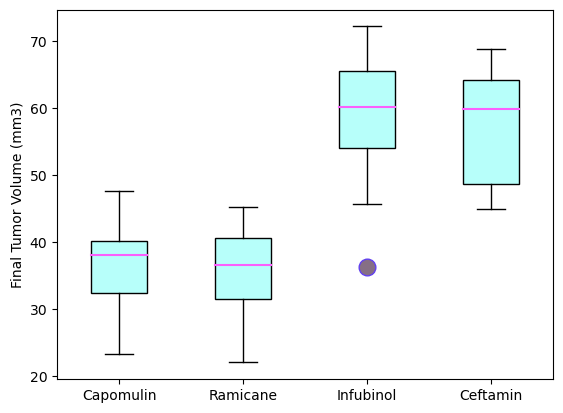

In [66]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
boxprops = dict(facecolor = "#b7fffa")
medianprops= dict(color = "#fb5ffc",  linewidth = 1.5)
flierprops=dict(markerfacecolor='#866f85',markersize=12, markeredgecolor = '#6140ef')
ax1.boxplot(tumor_vol, labels = treatments, flierprops = flierprops, 
            patch_artist=True, boxprops = boxprops, medianprops = medianprops )
plt.savefig("images/boxplt.png")
plt.show()

## Line and Scatter Plots

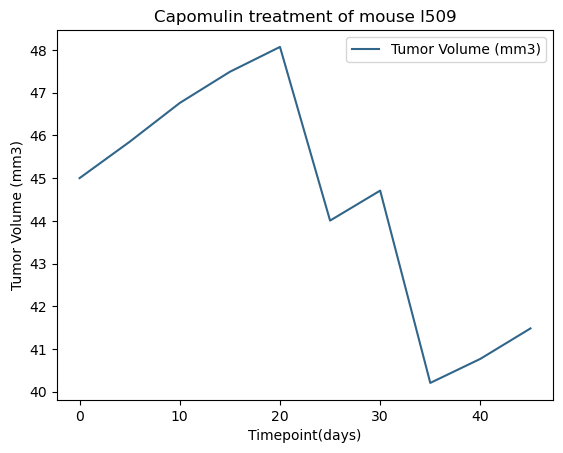

In [67]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = mouse_clean.loc[(mouse_clean["Drug Regimen"] == 'Capomulin')]
#specific mouse
l509_mouse = capomulin_mouse.loc[capomulin_mouse["Mouse ID"]=='l509']
l509_mouse.plot(kind = 'line', x = 'Timepoint', y = 'Tumor Volume (mm3)',xlabel = 'Timepoint(days)', ylabel = 'Tumor Volume (mm3)',
                  title="Capomulin treatment of mouse l509", color = '#31668a')
plt.savefig("images/mouseline.png")
plt.show()

/var/folders/1l/xk7lzzmd2pz9rmnz18h69nd40000gn/T/ipykernel_74056/1779681511.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weight_mouse = capomulin_mouse.groupby(['Mouse ID']).mean()


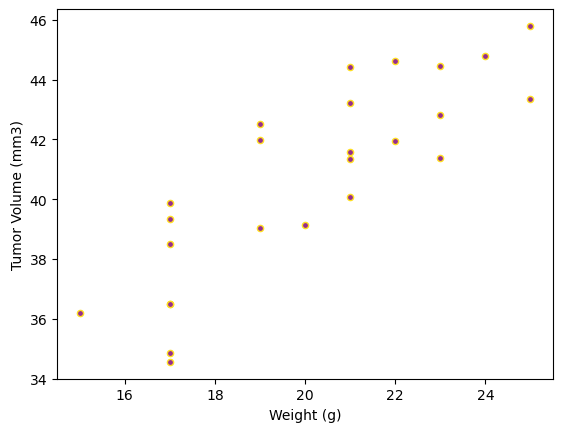

In [70]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight_mouse = capomulin_mouse.groupby(['Mouse ID']).mean()
weight_mouse.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", color = '#952e8f', edgecolor ='#ffdf22')
plt.savefig("images/scattermouse.png")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


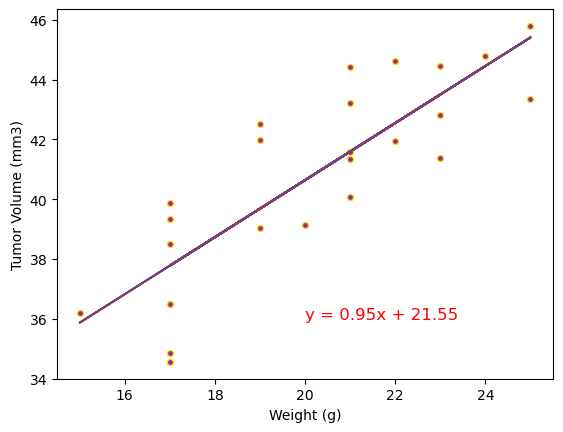

In [71]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = weight_mouse["Weight (g)"]
y_values = weight_mouse["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
correlation = st.pearsonr(x_values,y_values)
correlation = round(correlation[0],2)
print(f"The correlation between mouse weight and the average tumor volume is: {correlation}")
regress_values = x_values * slope + intercept
weight_mouse.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", color = '#952e8f', edgecolor ='#ffdf22')
plt.plot(x_values,regress_values,"#7e4071")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,36),fontsize=12,color="red")
plt.savefig("images/regressionmouse.png")
plt.show()


